# 1. Using Openpyxl with Workbooks 

- A Python library to read/write Excel 2010 xlsx/xlsm files


In [1]:
from openpyxl.workbook import Workbook
from openpyxl import load_workbook

### creating a workbook

In [2]:
wb = Workbook()
ws = wb.active        # a workbook is always created with at least one worksheet 

### creating new worksheets

In [3]:
ws1 = wb.create_sheet('NewSheet') #worksheet name is NewSheet

### indexing worksheets

In [4]:
ws2 = wb.create_sheet('Another', 0) # index is 0 - so it comes first

###  title function - renaming worksheets

In [5]:
ws.title = 'MySheet'

In [6]:
print(wb.sheetnames)

['Another', 'MySheet', 'NewSheet']


### load workbook function - loading existing workbook

In [7]:
wb2 = load_workbook('regions.xlsx')

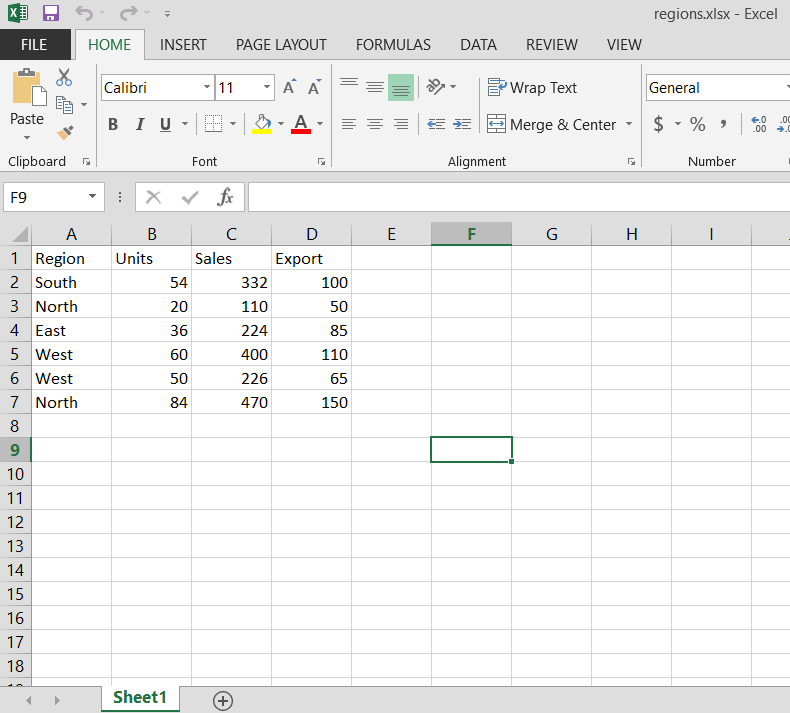

In [8]:
# add new worksheet
new_sheet = wb2.create_sheet('newsheet')

# get the active sheet
active_sheet = wb2.active

### accessing one cell
- Cells can be accessed directly as keys of the worksheet

In [9]:
cell = active_sheet ['A1']
print(cell)

<Cell 'Sheet1'.A1>


In [10]:
print(cell.value)

Region


### modify value of cells

In [11]:
active_sheet ['A1'] = 0

### save workbook

In [12]:
wb2.save('modified2.xlsx')

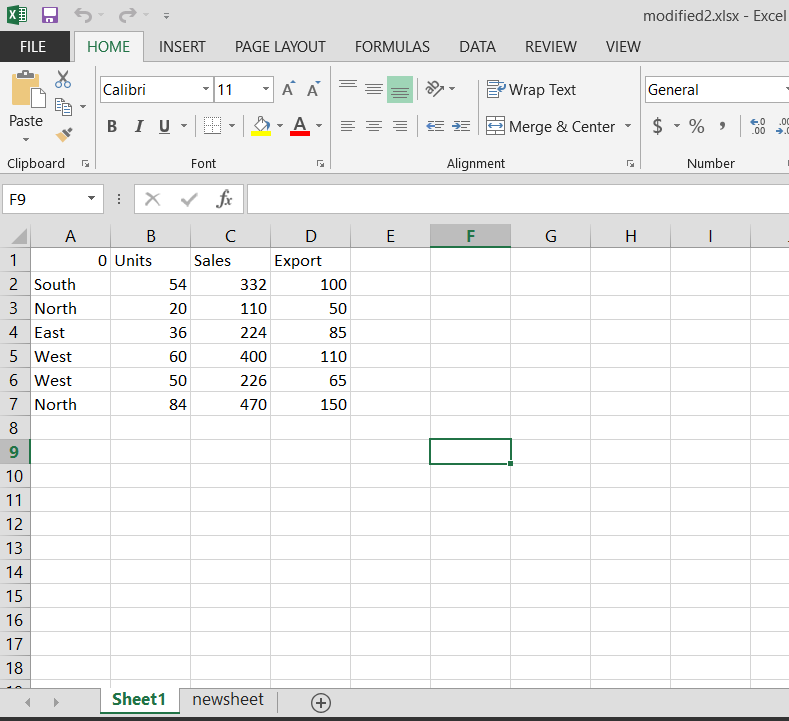

# 2. Selecting cells, rows, and columns

In [13]:
from openpyxl.workbook import Workbook
from openpyxl import load_workbook

In [14]:
wb = load_workbook('regions.xlsx')
ws = wb.active   

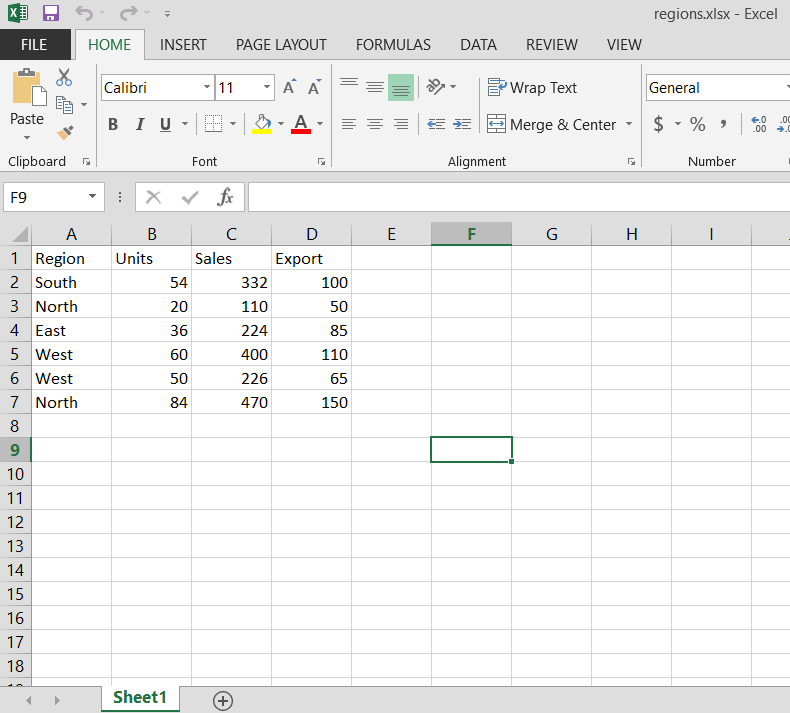

### Slicing -  accessing many cells

#### return cells of a row

In [15]:
cell_range = ws['A1': 'C1']
print(cell_range) 

# print given as row by row - 2D array

((<Cell 'Sheet1'.A1>, <Cell 'Sheet1'.B1>, <Cell 'Sheet1'.C1>),)


#### return cells of a column

In [16]:
column_c = ws['C']
print(column_c)
# column  - 1D array

(<Cell 'Sheet1'.C1>, <Cell 'Sheet1'.C2>, <Cell 'Sheet1'.C3>, <Cell 'Sheet1'.C4>, <Cell 'Sheet1'.C5>, <Cell 'Sheet1'.C6>, <Cell 'Sheet1'.C7>)


#### accessing a range of columns

In [17]:
column_range = ws ['A' : 'C']
print(column_range)
# print is 2D aaray - first index is column and second index is row

((<Cell 'Sheet1'.A1>, <Cell 'Sheet1'.A2>, <Cell 'Sheet1'.A3>, <Cell 'Sheet1'.A4>, <Cell 'Sheet1'.A5>, <Cell 'Sheet1'.A6>, <Cell 'Sheet1'.A7>), (<Cell 'Sheet1'.B1>, <Cell 'Sheet1'.B2>, <Cell 'Sheet1'.B3>, <Cell 'Sheet1'.B4>, <Cell 'Sheet1'.B5>, <Cell 'Sheet1'.B6>, <Cell 'Sheet1'.B7>), (<Cell 'Sheet1'.C1>, <Cell 'Sheet1'.C2>, <Cell 'Sheet1'.C3>, <Cell 'Sheet1'.C4>, <Cell 'Sheet1'.C5>, <Cell 'Sheet1'.C6>, <Cell 'Sheet1'.C7>))


> accessing B1 - index it at 1,1

#### accessing a range of rows

In [18]:
row_range = ws [1:5]
print(row_range)
# print is 2D aaray - first index is row and second index is column


((<Cell 'Sheet1'.A1>, <Cell 'Sheet1'.B1>, <Cell 'Sheet1'.C1>, <Cell 'Sheet1'.D1>), (<Cell 'Sheet1'.A2>, <Cell 'Sheet1'.B2>, <Cell 'Sheet1'.C2>, <Cell 'Sheet1'.D2>), (<Cell 'Sheet1'.A3>, <Cell 'Sheet1'.B3>, <Cell 'Sheet1'.C3>, <Cell 'Sheet1'.D3>), (<Cell 'Sheet1'.A4>, <Cell 'Sheet1'.B4>, <Cell 'Sheet1'.C4>, <Cell 'Sheet1'.D4>), (<Cell 'Sheet1'.A5>, <Cell 'Sheet1'.B5>, <Cell 'Sheet1'.C5>, <Cell 'Sheet1'.D5>))


> accessing B1 - index it at 0,1

#### worksheet.iter_rows() method - to return rows
- minimum row one corresponds to the first row 
- max row corresponds just to the second
- only have A1 to C2
- maximum column equals three- removes fourth column
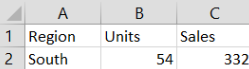

In [19]:
for row in ws.iter_rows(min_row=1, max_col=3, max_row=2):
    for cell in row:
        print(cell)

<Cell 'Sheet1'.A1>
<Cell 'Sheet1'.B1>
<Cell 'Sheet1'.C1>
<Cell 'Sheet1'.A2>
<Cell 'Sheet1'.B2>
<Cell 'Sheet1'.C2>


In [20]:
#  specify a flag in this iteration function- values only to be equal to True

for row in ws.iter_rows(min_row=1, max_col=3, max_row=2, values_only=True):
    for cell in row:
        print(cell)

Region
Units
Sales
South
54
332


# 3. Formatting workbooks



In [21]:
from openpyxl.styles import Font, colors, Alignment, PatternFill, GradientFill, Border, Side
from openpyxl.styles import NamedStyle
from openpyxl.workbook import Workbook

In [22]:
wb=Workbook()
ws=wb.active

 to do the excersize - fill spreadsheet with some integer values - using a loop

In [23]:
for i in range(1,20):
    ws.append(range(300))

### Merge / Unmerge Cells
- When you merge cells all cells but the top-left one are removed from the worksheet

method 1

In [24]:
ws.merge_cells("A1:B5")
ws.unmerge_cells("A1:B5")

method 2

In [25]:
ws.merge_cells(start_row=2, start_column=1, end_row=4, end_column=4)
ws.unmerge_cells(start_row=2, start_column=1, end_row=4, end_column=4)

In [26]:
cell=ws['B2']

### Font Alignment Fill
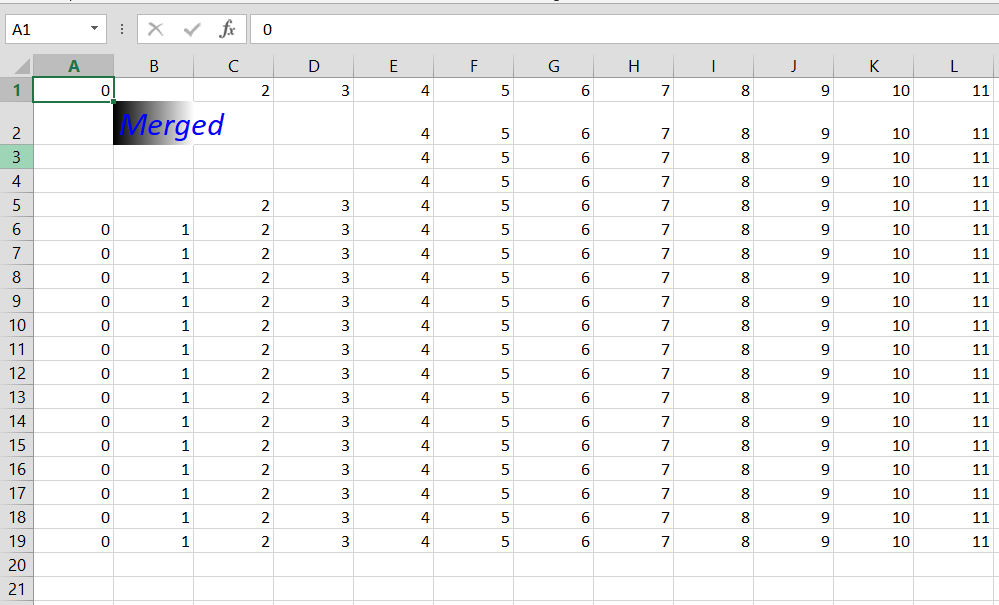

In [27]:
cell.font = Font(color= colors.BLUE, size=20, italic=True)

In [28]:
cell.value = 'Merged'

In [29]:
cell.alignment= Alignment(horizontal='left', vertical='top')

In [30]:
cell.fill= GradientFill(stop=("000000", "FFFFFF"))

In [31]:
wb.save('text.xlsx')

### Named Styles 
- objects that can be createed to store a style - for multiple use

In [32]:
highlight = NamedStyle(name='highlight')
highlight.font= Font(bold=True) # bold the font
bd = Side(style='thick', color='000000' )  # create border - thick black border
highlight.border = Border (left=bd, top=bd, right=bd, bottom=bd ) # set border
highlight.fill = PatternFill('solid', fgColor='FFFF00') # for solid color - not gradientfill use patternfill 

Apply this style to every cell diagonally starting at the H column
- make a count variable and set that equal to zero
- create a loop using the worksheet's iter columns function
- set the minimum column to 8 for H
- set the maximum 

> iter cols function column is stored as a list 
> so, can use the counter to index the list for the required rows
> every time column moves over one - counter should add one -  move one row down

In [33]:
count = 0
for col in ws.iter_cols(min_col=8, min_row=1, max_col=30, max_row=30):
    col[count].style = highlight
    count = count +1
wb.save('highlight.xlsx')

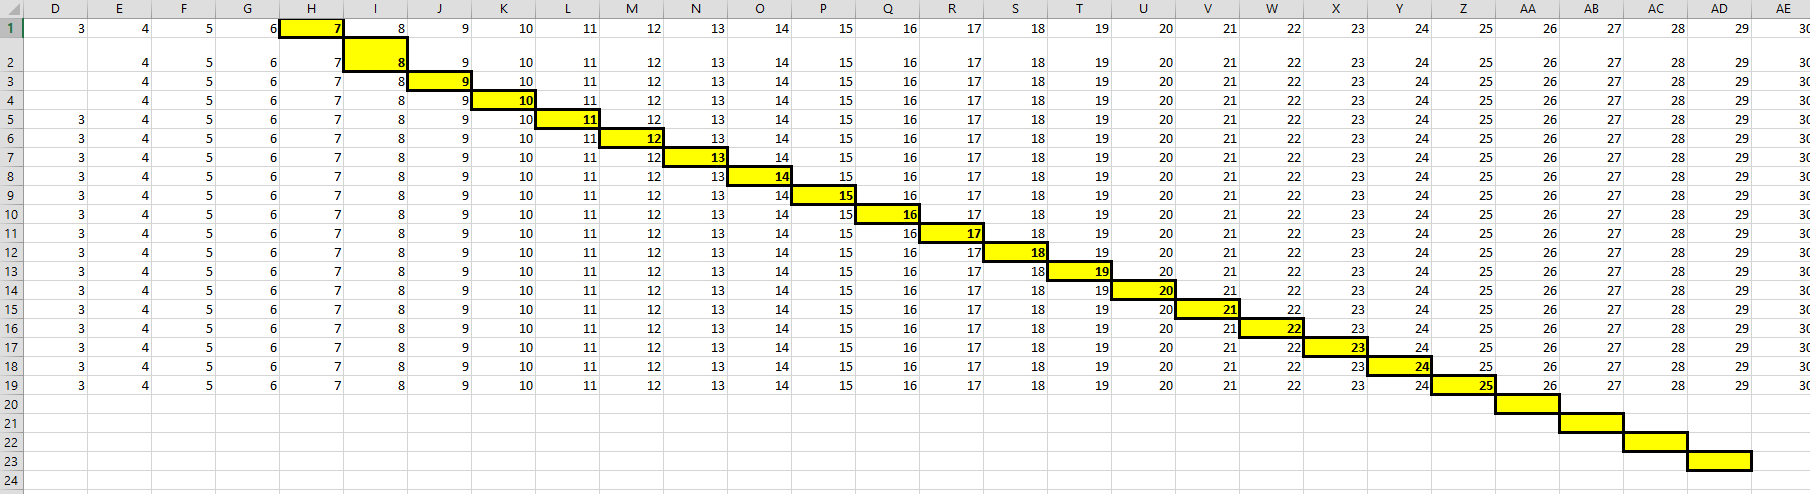

# 4. Graphs and Charts
## Pie Chart

In [34]:
import openpyxl
from openpyxl.chart import PieChart,Reference, Series,PieChart3D

In [35]:
wb=openpyxl.Workbook()   #empty workbook
ws=wb.active

### create own data set : ice-cream flavors & sold amount($)

- header rows- flavors, sold
- append data to active worksheet
> openpyxl  handle the formatting when it is transferred to Excel

In [36]:
data = [
    ['Flavor', 'Sold'],
    ['Vanilla', 1500],
    ['Chocolate', 1700],
    ['Strawberry', 600],
    ['Blueberry', 950]
]

for rows in data:
    ws.append(rows)

#### Reference 
- to look at locations for the data to be stored
- specify a minimum and maximum column and row - so the data inbetween will be selected

In [37]:
chart = PieChart()
labels = Reference(ws, min_col=1, min_row=2, max_row=5)
data = Reference(ws, min_col=2, min_row=2, max_row=5)

#### add data and labels to pie chart 
- using in-built functions, add_data and set_categories

In [38]:
chart.add_data(data, titles_from_data=True)
chart.set_categories(labels)

#### add chart title 

In [39]:
chart.title = "Ice Cream by Flavor"

#### add chart to worksheet

In [40]:
ws.add_chart(chart, 'C1') # set the chart to C1 
wb.save('PieChart.xlsx')

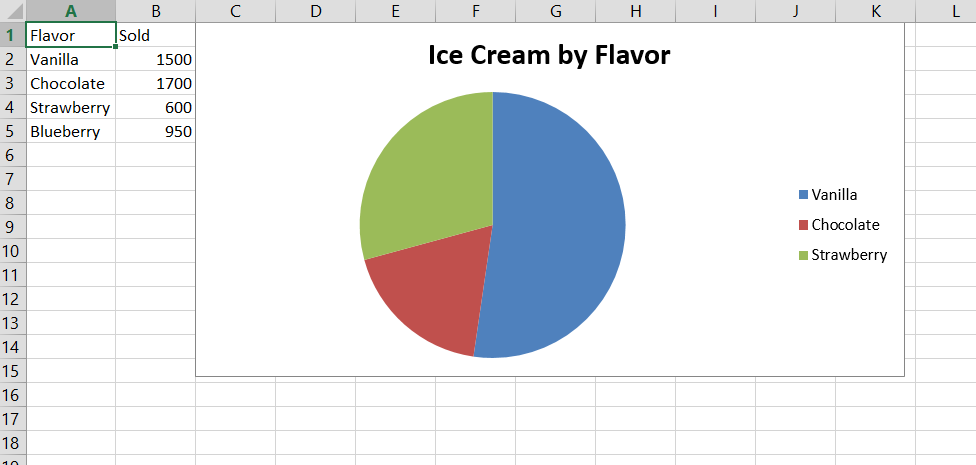

# 5. Tables and Images

In [41]:
from openpyxl.worksheet.table import Table, TableStyleInfo
from openpyxl.drawing.image import Image
from openpyxl import load_workbook

In [42]:
wb = load_workbook('Pie.xlsx')
ws=wb.active

### Creating a table


In [43]:
tab = Table(displayName='Table1', ref='A1:B5')

Table Style Information

In [44]:
style = TableStyleInfo(name= 'TableStyleMedium9', showFirstColumn=False, 
                       showLastColumn=False, showRowStripes=True, showColumnStripes=True)
tab.tableStyleInfo = style
ws.add_table(tab)
wb.save('table.xlsx')

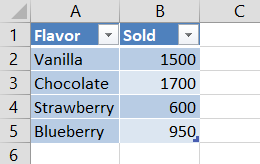

### Inserting Images -  Pillow library 
- save image file in the working directory - if not, specify a path
- create an image variable,  img 
- set it equal to the Image object

In [45]:
img = Image('madecraft.jpg')
ws.add_image(img, 'C1')
wb.save('image.xlsx')

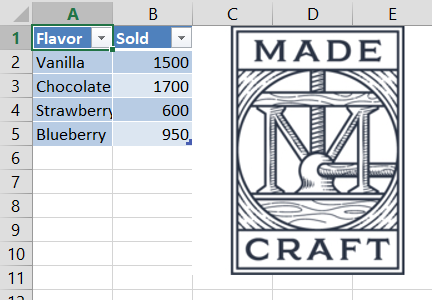

In [46]:
img = Image('madecraft.jpg')
img.height = img.height* .25
img.width = img.width *.25
ws.add_image(img, 'C1')
wb.save('image.xlsx')
wb.save('new_image.xlsx')

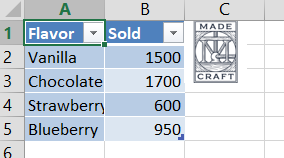